In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import os
from src.pythonclingointerface.clingo_interface import *
import matplotlib.pyplot as plt


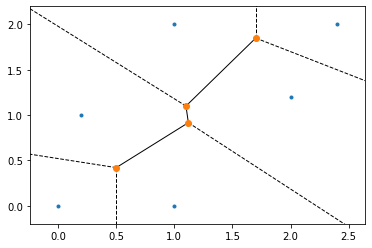

In [2]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np

points = np.array([[0, 0], [0.2, 1], [1, 0], [1, 2], [2, 1.2], [2.4, 2]])
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
plt.show()

<CLINGO

%3Color

{ assign(N,C) : color(C) } = 1 :- node(N).
:- edge(N,M), assign(N,C), assign(M,C).

CLINGO>

In [12]:
# print(interface.problems[0].problemCode)
interface=ClingoInterface()
interface.checkParenthesis(autoexecute=False)


for ridge in vor.ridge_points:
    interface.problems[0].addRelation("edge",str(ridge[0]),str(ridge[1]))

interface.problems[0].addFact("color","r")
interface.problems[0].addFact("color","b")
interface.problems[0].addFact("color","g")

interface.problems[0].addClause("node(0..5).")
interface.problems[0].executeClingoCode()

TestID: 
374
ClingoInterface: scanning 3ColorProblemExample.ipynb
['C:\\Users\\Oskar\\PycharmProjects\\PythonClingo_Interface\\examples\\3ColorProblemExample.ipynb']
Reading File:  C:\Users\Oskar\PycharmProjects\PythonClingo_Interface\examples\3ColorProblemExample.ipynb
Found Clingo Parenthesis in File:  C:\Users\Oskar\PycharmProjects\PythonClingo_Interface\examples\3ColorProblemExample.ipynb


In [ ]:
"""1th (0th) Solution of 1th(0th) Problem  """
colorSolution=interface.problems[0].solution.solutions[0]
assignColor=[]
for i in colorSolution:
    if(str(i).startswith("assign")):
        assignColor.append(str(i).strip("assign(").strip(")").split(","))

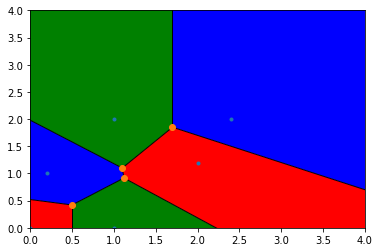

In [5]:
points = np.append(points, [[999,999], [-999,999], [999,-999], [-999,-999]], axis = 0)
vor = Voronoi(points)
voronoi_plot_2d(vor)
for assign in assignColor:
    polygon=[vor.vertices[i] for i in vor.regions[vor.point_region[int(assign[0])]]]
    plt.fill(*zip(*polygon),assign[1])

plt.xlim([0,4]), plt.ylim([0,4])

plt.show()